<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumSubroutineAlgorithms_QAA_Grok_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0519677acd411d615f90e8c30d5eee0cfc62f77d121b495b806f6bbfcb9dcc0b
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 107.0 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer, AerSimulator
from IPython.display import display, Math
import numpy as np

from qiskit.primitives import Sampler

In [7]:
# 1. 파라미터 설정
n_qubits = 3  # 3큐비트 시스템
target_state = '111'  # 목표 상태
num_iterations = 1  # 최적 반복 횟수 (대략 pi/(4*arcsin(1/sqrt(2^n))))

# 2. 양자 회로 초기화
qc = QuantumCircuit(n_qubits, n_qubits)

# 3. 초기 상태: 균일한 중첩 상태
for qubit in range(n_qubits):
    qc.h(qubit)

# 4. 오라클 구성
def oracle(circuit, n_qubits, target_state):
    # 목표 상태 |111>에 -1 위상 추가
    circuit.cz(0, 2)  # 다중 제어 Z 게이트 대체 (0, 2에 조건부 Z)
    circuit.cz(1, 2)  # |111>에만 -1 위상 적용

# 5. 확산 연산자 구성
def diffuser(circuit, n_qubits):
    # H 게이트 적용
    for qubit in range(n_qubits):
        circuit.h(qubit)
    # 다중 제어 Z 게이트로 반전
    for qubit in range(n_qubits):
        circuit.x(qubit)
    circuit.h(n_qubits - 1)
    circuit.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # 다중 제어 Toffoli
    circuit.h(n_qubits - 1)
    for qubit in range(n_qubits):
        circuit.x(qubit)
    # H 게이트 다시 적용
    for qubit in range(n_qubits):
        circuit.h(qubit)

# 6. QAA 반복
for _ in range(num_iterations):
    oracle(qc, n_qubits, target_state)
    diffuser(qc, n_qubits)

# 7. 측정
qc.measure(range(n_qubits), range(n_qubits))

# 8. 시뮬레이션 및 결과
simulator = AerSimulator()
sampler = Sampler()
result = sampler.run(qc, shots=1000).result()
counts = result.quasi_dists[0]



<ipython-input-7-82df2fa9e443>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


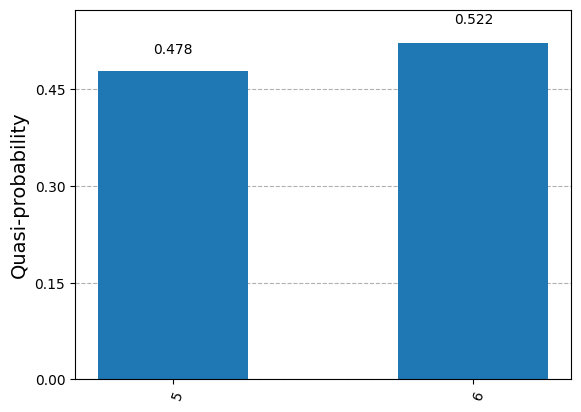

In [8]:
plot_histogram(counts)

In [ ]:
# 9. 결과 출력 및 시각화
counts_binary = {format(state, f'0{n_qubits}b'): prob for state, prob in counts.items()}
print("Measurement counts:", counts_binary)
plot_histogram(counts_binary, title="QAA: Probability Distribution")